In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['shopping_trends.csv']))
df

Customer ID  Age Gender Item Purchased     Category  \
0              1   55   Male         Blouse     Clothing   
1              2   19   Male        Sweater     Clothing   
2              3   50   Male          Jeans     Clothing   
3              4   21   Male        Sandals     Footwear   
4              5   45   Male         Blouse     Clothing   
..           ...  ...    ...            ...          ...   
995          996   44   Male        Jewelry  Accessories   
996          997   29   Male        Sandals     Footwear   
997          998   64   Male          Pants     Clothing   
998          999   51   Male          Shoes     Footwear   
999         1000   50   Male          Socks     Clothing   

     Purchase Amount (USD)       Location Size      Color  Season  \
0                       53       Kentucky    L       Gray  Winter   
1                       64          Maine    L     Maroon  Winter   
2                       73  Massachusetts    S     Maroon  Spring   
3                       90   Rhode Island    M     Maroon  Spring   
4                       49         Oregon    M  Turquoise  Spring   
..                     ...            ...  ...        ...     ...   
995                     80          Idaho    M    Magenta  Spring   
996                     91       Delaware    L     Maroon  Summer   
997                     30       Kentucky    M       Cyan  Spring   
998                     90    Connecticut    M      White  Spring   
999                     28     New Mexico    L      Brown  Spring   

     Review Rating Subscription Status Payment Method   Shipping Type  \
0              3.1                 Yes    Credit Card         Express   
1              3.1                 Yes  Bank Transfer         Express   
2              3.1                 Yes           Cash   Free Shipping   
3              3.5                 Yes         PayPal    Next Day Air   
4              2.7                 Yes           Cash   Free Shipping   
..             ...                 ...            ...             ...   
995            3.0                 Yes          Venmo  2-Day Shipping   
996            4.9                 Yes  Bank Transfer        Standard   
997            3.6                 Yes     Debit Card         Express   
998            3.8                 Yes          Venmo    Next Day Air   
999            2.9                 Yes          Venmo        Standard   

    Discount Applied Promo Code Used  Previous Purchases  \
0                Yes             Yes                  14   
1                Yes             Yes                   2   
2                Yes             Yes                  23   
3                Yes             Yes                  49   
4                Yes             Yes                  31   
..               ...             ...                 ...   
995              Yes             Yes                  10   
996              Yes             Yes                  32   
997              Yes             Yes                  31   
998              Yes             Yes                  48   
999              Yes             Yes                  23   

    Preferred Payment Method Frequency of Purchases  
0                      Venmo            Fortnightly  
1                       Cash            Fortnightly  
2                Credit Card                 Weekly  
3                     PayPal                 Weekly  
4                     PayPal               Annually  
..                       ...                    ...  
995                    Venmo                 Weekly  
996            Bank Transfer              Quarterly  
997                     Cash            Fortnightly  
998            Bank Transfer              Bi-Weekly  
999               Debit Card                Monthly  

[1000 rows x 19 columns]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Item Purchased            1000 non-null   object 
 4   Category                  1000 non-null   object 
 5   Purchase Amount (USD)     1000 non-null   int64  
 6   Location                  1000 non-null   object 
 7   Size                      1000 non-null   object 
 8   Color                     1000 non-null   object 
 9   Season                    1000 non-null   object 
 10  Review Rating             1000 non-null   float64
 11  Subscription Status       1000 non-null   object 
 12  Payment Method            1000 non-null   object 
 13  Shipping Type             1000 non-null   object 
 14  Discount 

In [ ]:
from networkx.algorithms import bipartite
B = nx.Graph()
ItemPurchased = df['Item Purchased']
Location = df['Location']
print("Số loại sản phẩm: ", ItemPurchased.nunique())
print("Số location: ", Location.nunique())
print("Số cạnh: ", len(df))

Số loại sản phẩm:  25
Số location:  50
Số cạnh:  1000


# **Đồ thị 2 phía**
---








In [ ]:
for index, row in df.iterrows():
  B.add_edge(row['Item Purchased'], row['Location'], weight=1)
B.add_nodes_from(ItemPurchased, bipartite=0)
B.add_nodes_from(Location, bipartite=1)

<Figure size 1200x1200 with 0 Axes>

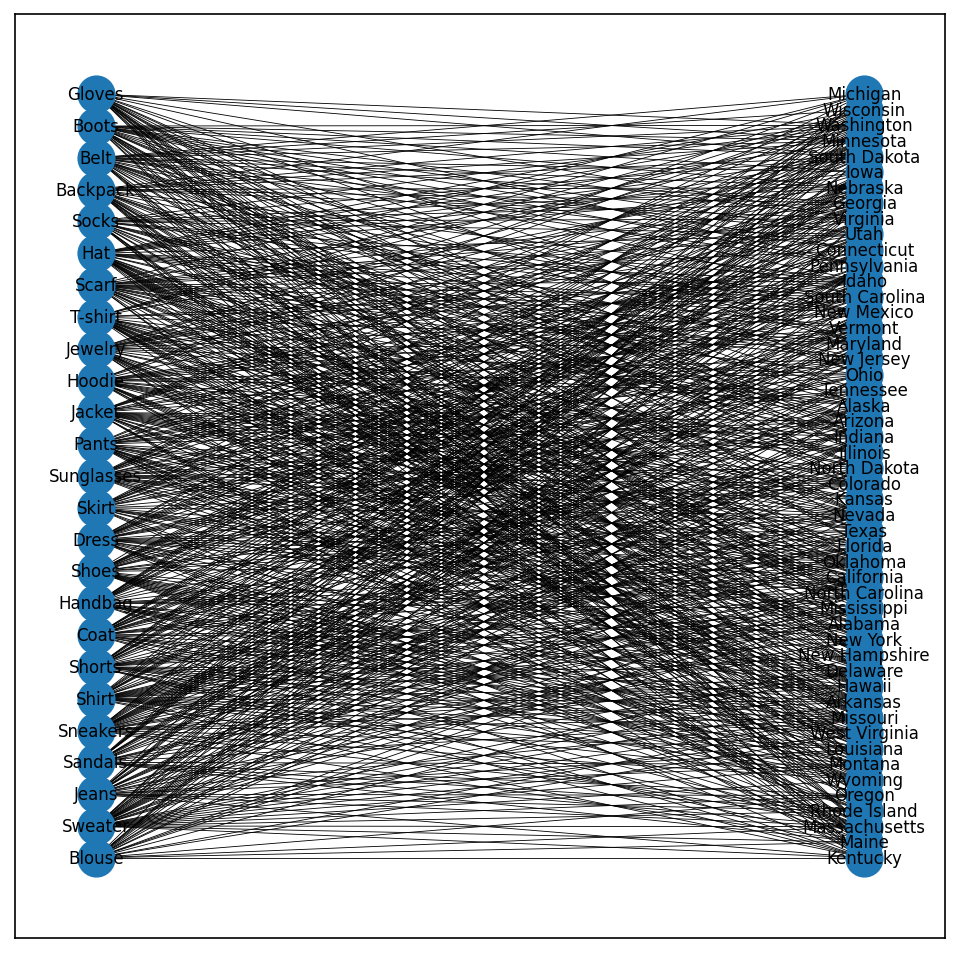

In [ ]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, ItemPurchased), font_size=8, width=0.4)

In [ ]:
unique_location = Location.unique()

# **Đồ thị 1 phía**

---



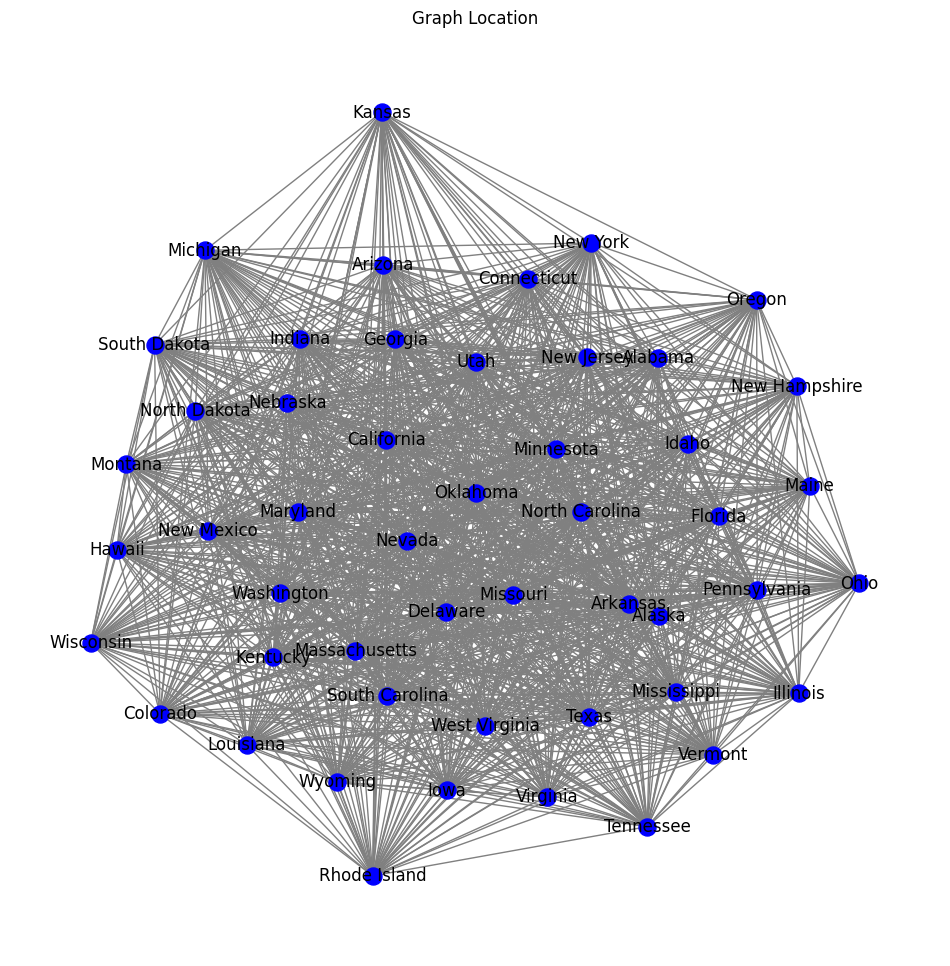

In [ ]:
G = bipartite.weighted_projected_graph(B, unique_location)

plt.figure(figsize=(12, 12))
layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, layout, nodelist=unique_location, node_size=150, node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='gray')
node_labels = dict(zip(unique_location, unique_location))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')
plt.title("Graph Location")
plt.show()

# **Xuất đồ thị 1 phía csv**

---



In [ ]:
labels = nx.get_edge_attributes(G, 'weight')
# Tạo danh sách để lưu các hàng
rows = []

for key, value in labels.items():
    rows.append({'Source': key[0], 'Target': key[1], 'Weight': value})

# Chuyển danh sách thành DataFrame
df2 = pd.DataFrame(rows)

# Xuất DataFrame ra file CSV
df2.to_csv('mydata.csv', index=False, header=True)


# **Betweenness Centrality**

---



In [ ]:
betweenness = nx.betweenness_centrality(G, normalized=True)  # Betweenness Centrality
print("Betweenness Centrality (Top 10):")
for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{k}: {v}")

Betweenness Centrality (Top 10):
Kentucky: 0.0
Maine: 0.0
Massachusetts: 0.0
Rhode Island: 0.0
Oregon: 0.0
Wyoming: 0.0
Montana: 0.0
Louisiana: 0.0
West Virginia: 0.0
Missouri: 0.0


# **Closeness Centrality**

---



In [ ]:
closeness = nx.closeness_centrality(G)  # Closeness Centrality
print("\nCloseness Centrality (Top 10):")
for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{k}: {v}")


Closeness Centrality (Top 10):
Kentucky: 1.0
Maine: 1.0
Massachusetts: 1.0
Rhode Island: 1.0
Oregon: 1.0
Wyoming: 1.0
Montana: 1.0
Louisiana: 1.0
West Virginia: 1.0
Missouri: 1.0


# **PageRank**

---



In [ ]:
pagerank = nx.pagerank(G)  # PageRank
print("\nPageRank (Top 10):")
for k, v in sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{k}: {v}")


PageRank (Top 10):
Nevada: 0.02616786283212917
Missouri: 0.026088451869592993
Delaware: 0.026079505410333118
Oklahoma: 0.024963328135245873
North Carolina: 0.024624150871884
Minnesota: 0.02384711190235399
California: 0.023809420211672625
Massachusetts: 0.023510328733406423
Arkansas: 0.022918726973629587
Washington: 0.022390214142341634


# **Eigenvector Centrality**

---



In [ ]:
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)  # Eigenvector Centrality
print("\nEigenvector Centrality (Top 10):")
for k, v in sorted(eigenvector.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{k}: {v}")


Eigenvector Centrality (Top 10):
Kentucky: 0.1414213562373095
Maine: 0.1414213562373095
Massachusetts: 0.1414213562373095
Rhode Island: 0.1414213562373095
Oregon: 0.1414213562373095
Wyoming: 0.1414213562373095
Montana: 0.1414213562373095
Louisiana: 0.1414213562373095
West Virginia: 0.1414213562373095
Missouri: 0.1414213562373095


# **Thuật toán Louvain**

---



In [ ]:
import matplotlib.cm as cm
import community.community_louvain as community_louvain

<ipython-input-29-79bffe85d8ec>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


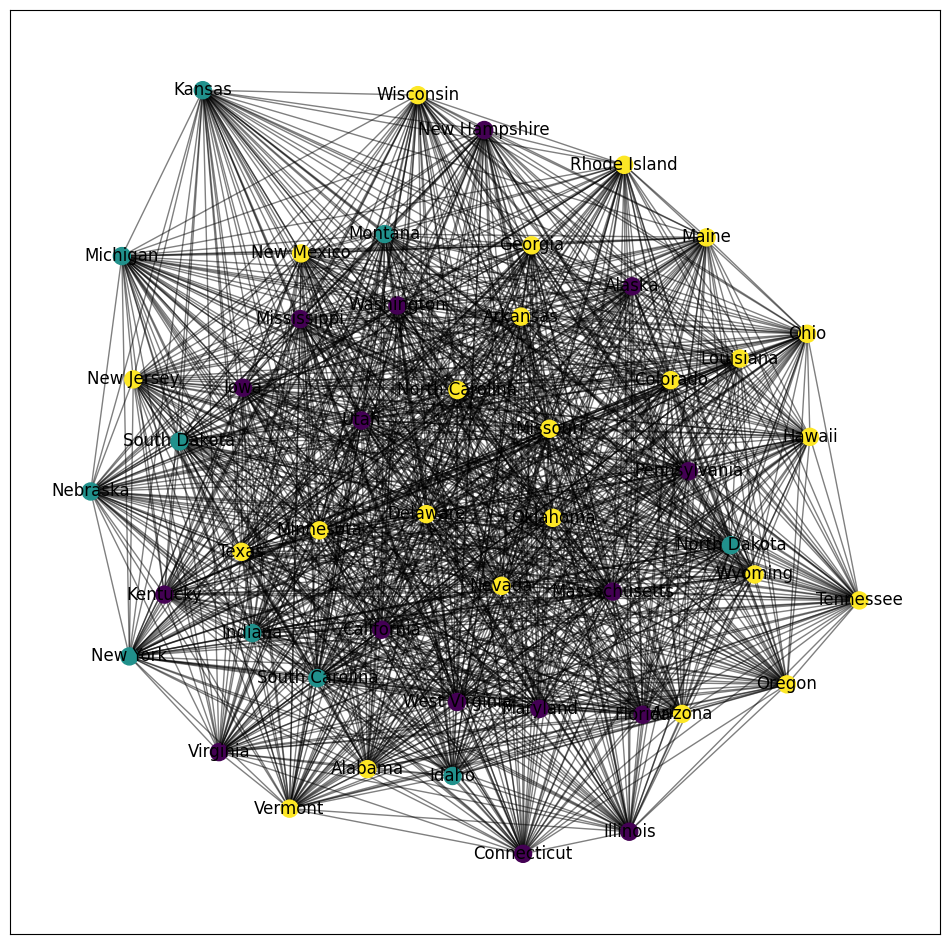

In [ ]:
plt.figure(figsize=(12, 12))
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_color=list(partition.values()), cmap=cmap, node_size=150)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.show()

In [ ]:
values = list(partition.values())
print("Số lượng community: ", len(set(values)))

Số lượng community:  3


In [ ]:
import numpy as np
for i in range(len(np.unique(values))):
  print("Community ", i, "******************")
  for name, k in partition.items():
    if k == i:
      print(name)
  print("")

Community  0 ******************
Kentucky
Massachusetts
West Virginia
New Hampshire
Mississippi
California
Florida
Illinois
Alaska
Maryland
Pennsylvania
Connecticut
Utah
Virginia
Iowa
Washington

Community  1 ******************
Montana
New York
Kansas
North Dakota
Indiana
South Carolina
Idaho
Nebraska
South Dakota
Michigan

Community  2 ******************
Maine
Rhode Island
Oregon
Wyoming
Louisiana
Missouri
Arkansas
Hawaii
Delaware
Alabama
North Carolina
Oklahoma
Texas
Nevada
Colorado
Arizona
Tennessee
Ohio
New Jersey
Vermont
New Mexico
Georgia
Minnesota
Wisconsin



In [ ]:
df['Cluster'] = df['Location'].map(partition)
df

Customer ID  Age Gender Item Purchased     Category  \
0              1   55   Male         Blouse     Clothing   
1              2   19   Male        Sweater     Clothing   
2              3   50   Male          Jeans     Clothing   
3              4   21   Male        Sandals     Footwear   
4              5   45   Male         Blouse     Clothing   
..           ...  ...    ...            ...          ...   
995          996   44   Male        Jewelry  Accessories   
996          997   29   Male        Sandals     Footwear   
997          998   64   Male          Pants     Clothing   
998          999   51   Male          Shoes     Footwear   
999         1000   50   Male          Socks     Clothing   

     Purchase Amount (USD)       Location Size      Color  Season  \
0                       53       Kentucky    L       Gray  Winter   
1                       64          Maine    L     Maroon  Winter   
2                       73  Massachusetts    S     Maroon  Spring   
3                       90   Rhode Island    M     Maroon  Spring   
4                       49         Oregon    M  Turquoise  Spring   
..                     ...            ...  ...        ...     ...   
995                     80          Idaho    M    Magenta  Spring   
996                     91       Delaware    L     Maroon  Summer   
997                     30       Kentucky    M       Cyan  Spring   
998                     90    Connecticut    M      White  Spring   
999                     28     New Mexico    L      Brown  Spring   

     Review Rating Subscription Status Payment Method   Shipping Type  \
0              3.1                 Yes    Credit Card         Express   
1              3.1                 Yes  Bank Transfer         Express   
2              3.1                 Yes           Cash   Free Shipping   
3              3.5                 Yes         PayPal    Next Day Air   
4              2.7                 Yes           Cash   Free Shipping   
..             ...                 ...            ...             ...   
995            3.0                 Yes          Venmo  2-Day Shipping   
996            4.9                 Yes  Bank Transfer        Standard   
997            3.6                 Yes     Debit Card         Express   
998            3.8                 Yes          Venmo    Next Day Air   
999            2.9                 Yes          Venmo        Standard   

    Discount Applied Promo Code Used  Previous Purchases  \
0                Yes             Yes                  14   
1                Yes             Yes                   2   
2                Yes             Yes                  23   
3                Yes             Yes                  49   
4                Yes             Yes                  31   
..               ...             ...                 ...   
995              Yes             Yes                  10   
996              Yes             Yes                  32   
997              Yes             Yes                  31   
998              Yes             Yes                  48   
999              Yes             Yes                  23   

    Preferred Payment Method Frequency of Purchases  Cluster  
0                      Venmo            Fortnightly        0  
1                       Cash            Fortnightly        2  
2                Credit Card                 Weekly        0  
3                     PayPal                 Weekly        2  
4                     PayPal               Annually        2  
..                       ...                    ...      ...  
995                    Venmo                 Weekly        1  
996            Bank Transfer              Quarterly        2  
997                     Cash            Fortnightly        0  
998            Bank Transfer              Bi-Weekly        0  
999               Debit Card                Monthly        2  

[1000 rows x 20 columns]

In [ ]:
df.to_excel('clusters_louvain.xlsx', index=False)

In [ ]:
df.drop(columns=['Cluster'], inplace=True)

# **Thuật toán Girvan-Newman**

---



In [ ]:
from sklearn.cluster import KMeans
from networkx.algorithms import community

Girvan-Newman communities:
Community 0: ['Kentucky']
Community 1: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


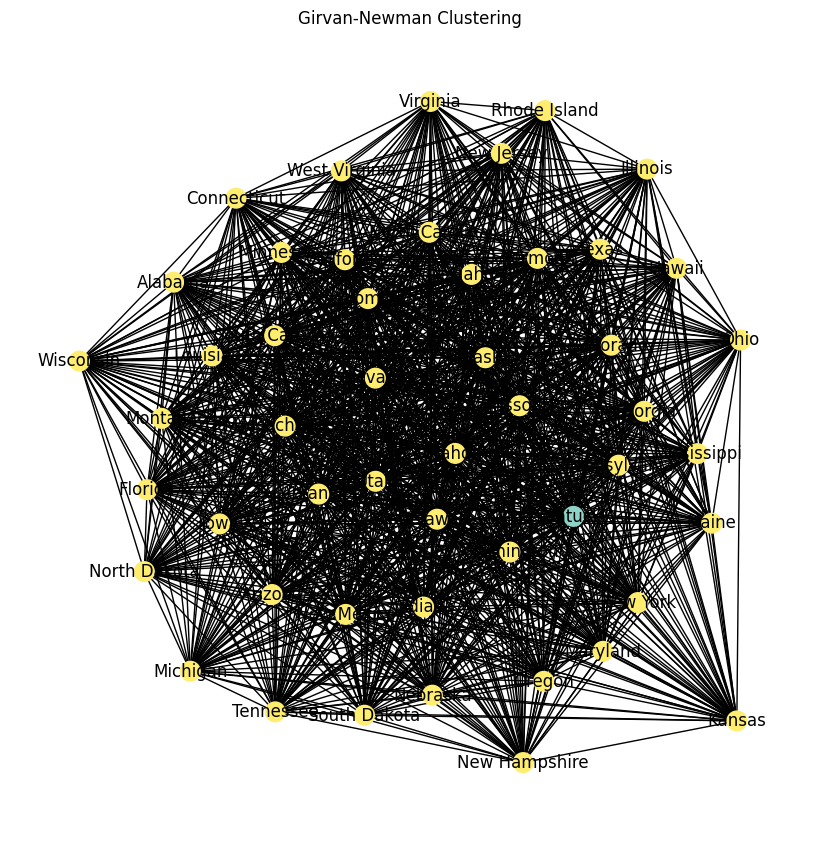

In [ ]:
comp = community.girvan_newman(G) # comp là một generator, mỗi bước yield ra một phân hoạch
# Lấy ra phân hoạch đầu tiên (tách G thành 2 cộng đồng)
gn_communities = tuple(sorted(c) for c in next(comp))

print("Girvan-Newman communities:")
for i, comm in enumerate(gn_communities):
    print(f"Community {i}:", comm)

# Vẽ đồ thị với màu sắc theo cộng đồng Girvan-Newman
color_map = {}
for i, comm in enumerate(gn_communities):
    for node in comm:
        color_map[node] = i

pos = nx.spring_layout(G)
colors = [color_map[node] for node in G.nodes()]

plt.figure(figsize=(8,8))
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set3, node_size=200)
plt.title("Girvan-Newman Clustering")
plt.show()


In [ ]:
df['Cluster'] = df['Location'].map(color_map)

In [ ]:
df.to_excel('clusters_girvan.xlsx', index=False)
df.drop(columns=['Cluster'], inplace=True)

# **Thuật toán Kmeans**

---



K-Means Clusters:
Cluster 0: ['Massachusetts', 'Missouri', 'Arkansas', 'Delaware', 'North Carolina', 'California', 'Oklahoma', 'Nevada', 'Minnesota']
Cluster 1: ['Maine', 'Rhode Island', 'Oregon', 'New Hampshire', 'New York', 'Florida', 'Kansas', 'Illinois', 'Tennessee', 'Ohio', 'New Jersey', 'Connecticut', 'Virginia', 'South Dakota', 'Wisconsin', 'Michigan']
Cluster 2: ['Kentucky', 'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Hawaii', 'Alabama', 'Mississippi', 'Texas', 'Colorado', 'North Dakota', 'Indiana', 'Arizona', 'Alaska', 'Maryland', 'Vermont', 'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania', 'Utah', 'Georgia', 'Nebraska', 'Iowa', 'Washington']


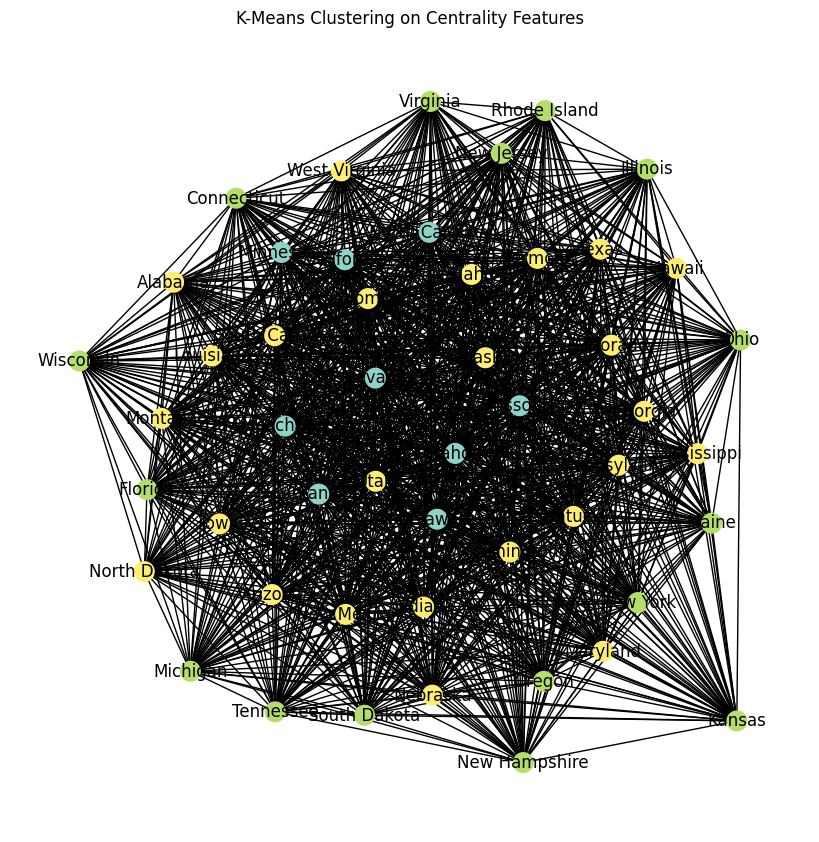

In [ ]:
# Tính lại centrality (nếu chưa có)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)
eigenvector = nx.eigenvector_centrality(G)

# Tạo ma trận đặc trưng cho K-Means
nodes = list(G.nodes())
X = []
for n in nodes:
    X.append([
        betweenness[n],
        closeness[n],
        pagerank[n],
        eigenvector[n]
    ])
X = np.array(X)

# Áp dụng K-Means, giả sử phân thành 3 cụm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

print("K-Means Clusters:")
for i in range(3):
    cluster_nodes = [nodes[j] for j in range(len(nodes)) if kmeans_labels[j] == i]
    print(f"Cluster {i}:", cluster_nodes)

# Vẽ đồ thị, tô màu theo kết quả K-Means
color_map = kmeans_labels
plt.figure(figsize=(8,8))
nx.draw(G, pos, node_color=color_map, with_labels=True, cmap=plt.cm.Set3, node_size=200)
plt.title("K-Means Clustering on Centrality Features")
plt.show()


In [ ]:
node_cluster_map = {node: label for node, label in zip(nodes, kmeans_labels)}
df['Cluster'] = df['Location'].map(node_cluster_map)

In [ ]:
df.to_excel('clusters_kmeans.xlsx', index=False)
df.drop(columns=['Cluster'], inplace=True)

# **Thuật toán KNN**

---



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering on k-NN Graph:
Cluster 0: ['Maine', 'Rhode Island', 'Oregon', 'New Hampshire', 'New York', 'Florida', 'Kansas', 'Illinois', 'Tennessee', 'Ohio', 'New Jersey', 'Connecticut', 'Virginia', 'South Dakota', 'Wisconsin', 'Michigan']
Cluster 1: ['Kentucky', 'Massachusetts', 'Wyoming', 'Montana', 'West Virginia', 'Missouri', 'Arkansas', 'Delaware', 'North Carolina', 'California', 'Oklahoma', 'Nevada', 'Indiana', 'New Mexico', 'South Carolina', 'Idaho', 'Utah', 'Georgia', 'Minnesota', 'Washington']
Cluster 2: ['Louisiana', 'Hawaii', 'Alabama', 'Mississippi', 'Texas', 'Colorado', 'North Dakota', 'Arizona', 'Alaska', 'Maryland', 'Vermont', 'Pennsylvania', 'Nebraska', 'Iowa']


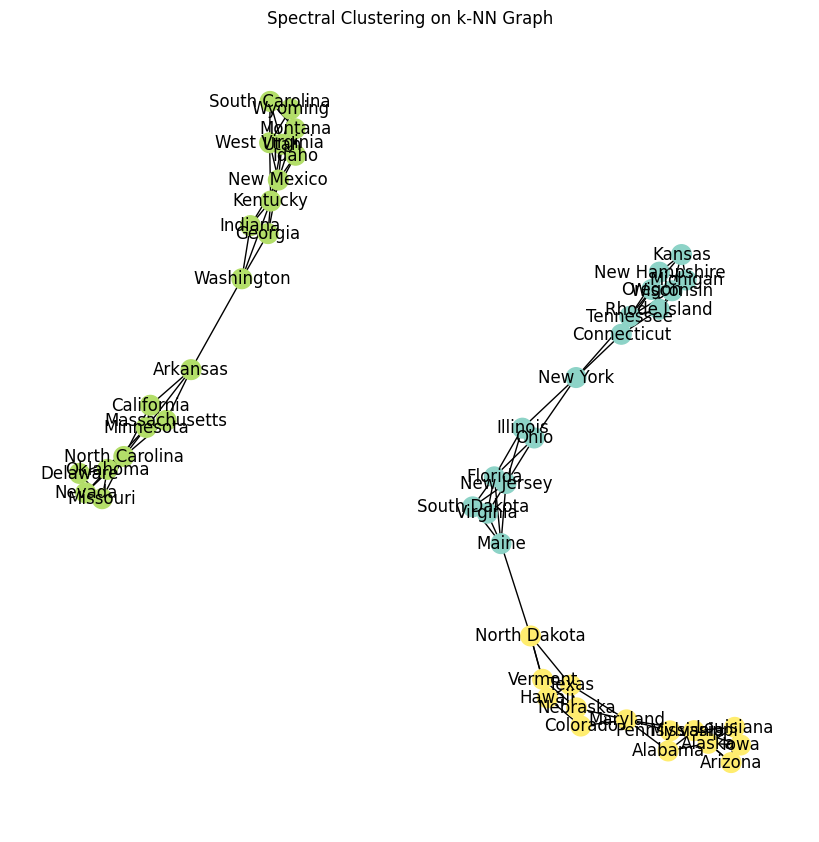

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering

# X đã có ở trên (từ centrality)
# Xây dựng k-NN graph
k = 5
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# Tạo một đồ thị k-NN (chỉ giữ cạnh giữa nút và k láng giềng gần nhất)
knn_graph = nx.Graph()
knn_graph.add_nodes_from(nodes)
for i, nbr_list in enumerate(indices):
    n1 = nodes[i]
    for idx in nbr_list[1:]: # Bỏ qua phần tử đầu tiên vì chính nó
        n2 = nodes[idx]
        # thêm cạnh vào knn_graph
        knn_graph.add_edge(n1, n2)

# Bây giờ phân cụm trên knn_graph sử dụng Spectral Clustering
adj_mat = nx.to_numpy_array(knn_graph, nodelist=nodes)
sc = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
sc_labels = sc.fit_predict(adj_mat)

print("Spectral Clustering on k-NN Graph:")
for i in range(3):
    cluster_nodes = [nodes[j] for j in range(len(nodes)) if sc_labels[j] == i]
    print(f"Cluster {i}:", cluster_nodes)

# Vẽ đồ thị k-NN, màu theo cụm
color_map = sc_labels
pos_knn = nx.spring_layout(knn_graph)
plt.figure(figsize=(8,8))
nx.draw(knn_graph, pos_knn, node_color=color_map, with_labels=True, cmap=plt.cm.Set3, node_size=200)
plt.title("Spectral Clustering on k-NN Graph")
plt.show()


In [ ]:
node_cluster_map = {node: label for node, label in zip(nodes, sc_labels)}
df['Cluster'] = df['Location'].map(node_cluster_map)

In [ ]:
df.to_excel('clusters_knn.xlsx', index=False)
df.drop(columns=['Cluster'], inplace=True)